In [200]:
import pandas as pd

transform from all divisions and year into 1 dataframe for each country

In [201]:
import os
import pandas as pd

root_dir = "data"
folder_dfs = {}  # Nested dict: country -> subfolder -> CSV -> DataFrame

# Walk through all directories
for dirpath, dirnames, filenames in os.walk(root_dir):
    if dirpath == root_dir:
        continue  # skip root

    # Split the path components relative to data/
    rel_path = os.path.relpath(dirpath, root_dir).split(os.sep)

    # Expecting: ["england", "0"] or ["england", "1"], etc.
    if len(rel_path) != 2:
        continue  # skip if not exactly two levels below root

    country, subfolder = rel_path

    # Initialize nested dicts
    folder_dfs.setdefault(country, {})
    folder_dfs[country].setdefault(subfolder, {})

    # Loop through CSV files
    for filename in filenames:
        if filename.endswith(".csv"):
            file_path = os.path.join(dirpath, filename)
            df = pd.read_csv(file_path)

            csv_name = os.path.splitext(filename)[0]  # e.g. "1920"
            folder_dfs[country][subfolder][csv_name] = df

# Check the structure
for country, subfolders in folder_dfs.items():
    print(f"\nCountry: {country}")
    for sub, csvs in subfolders.items():
        print(f"Subfolder: {sub}")
        for name, df in csvs.items():
            print(f"    - {name}.csv → shape={df.shape}")


def concat_country_data(country_name):
    """Concatenate all CSVs for a given country (across all subfolders)."""
    # Flatten all subfolder DataFrames into one list
    dfs = []
    for subfolder in folder_dfs[country_name].values():
        dfs.extend(subfolder.values())
    # Combine them into one big DataFrame
    return pd.concat(dfs, ignore_index=True)

# Build DataFrames per country
belgium_data     = concat_country_data("belgium")
england_data     = concat_country_data("england")
france_data      = concat_country_data("france")
germany_data     = concat_country_data("germany")
greece_data      = concat_country_data("greece")
italy_data       = concat_country_data("italy")
netherlands_data = concat_country_data("netherlands")
portugal_data    = concat_country_data("portugal")
scotland_data    = concat_country_data("scotland")
spain_data       = concat_country_data("spain")
turkey_data      = concat_country_data("turkey")



FILEPATH=""
country_dfs = {
    "belgium": belgium_data,
    "england": england_data,
    "france": france_data,
    "germany": germany_data,
    "greece": greece_data,
    "italy": italy_data,
    "netherlands": netherlands_data,
    "portugal": portugal_data,
    "scotland": scotland_data,
    "spain": spain_data,
    "turkey": turkey_data
}


output_dir = "combined_csvs"  # folder to save all CSVs
os.makedirs(output_dir, exist_ok=True)  # create folder if it doesn't exist

for country, df in country_dfs.items():
    # Safe file path
    file_path = os.path.join(output_dir, f"{country}.csv")
    
    df.to_csv(file_path, index=False)
    print(f" Saved {file_path} (shape={df.shape})")


Country: belgium
Subfolder: 1
    - 1920.csv → shape=(232, 105)
    - 2021.csv → shape=(306, 105)
    - 2122.csv → shape=(306, 106)
    - 2223.csv → shape=(306, 105)
    - 2324.csv → shape=(312, 105)
    - 2425.csv → shape=(312, 121)

Country: england
Subfolder: 0
    - 1920.csv → shape=(380, 106)
    - 2021.csv → shape=(380, 106)
    - 2122.csv → shape=(380, 106)
    - 2223.csv → shape=(380, 106)
    - 2324.csv → shape=(380, 106)
    - 2425.csv → shape=(380, 120)
Subfolder: 1
    - 1920.csv → shape=(552, 106)
    - 2021.csv → shape=(552, 106)
    - 2122.csv → shape=(552, 106)
    - 2223.csv → shape=(552, 106)
    - 2324.csv → shape=(552, 106)
    - 2425.csv → shape=(552, 120)
Subfolder: 2
    - 1920.csv → shape=(400, 106)
    - 2021.csv → shape=(552, 106)
    - 2122.csv → shape=(552, 106)
    - 2223.csv → shape=(552, 106)
    - 2324.csv → shape=(552, 106)
    - 2425.csv → shape=(552, 120)
Subfolder: 3
    - 1920.csv → shape=(440, 106)
    - 2021.csv → shape=(552, 106)
    - 2122.csv 

all the single countries import for all years and all divisions

In [202]:
#this import a bit useless since data is already here, but in case of separation its good 
#import of data
b_data=pd.read_csv(r'combined_csvs\belgium.csv')
eng_data = pd.read_csv(r'combined_csvs\england.csv')
fr_data=pd.read_csv(r'combined_csvs\france.csv')
d_data=pd.read_csv(r'combined_csvs\germany.csv')
gr_data=pd.read_csv(r'combined_csvs\greece.csv')
it_data=pd.read_csv(r'combined_csvs\italy.csv')
ne_data=pd.read_csv(r'combined_csvs\netherlands.csv')
por_data=pd.read_csv(r'combined_csvs\portugal.csv')
sc_data=pd.read_csv(r'combined_csvs\scotland.csv')
sp_data=pd.read_csv(r'combined_csvs\spain.csv')
tur_data=pd.read_csv(r'combined_csvs\turkey.csv')


C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\1879345392.py:11: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  sc_data=pd.read_csv(r'combined_csvs\scotland.csv')


# function creates the small dataset(s) for A0 model

In [203]:
col_list_original=['Div','Date','Time','HomeTeam','AwayTeam','FTHG','FTAG','FTR']
def original_data(df,feature_list):
    df=df[feature_list]
    df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
    df.drop(columns=['Div'], inplace=True)
    df['Total_goals']=df['FTHG']+df['FTAG']
    df['Target']= (df['Total_goals']>2.5).astype(int) #1 if more than 2 goals were scored, else 0
    return df


b_data_a0= original_data(b_data,col_list_original)
eng_data_a0 = original_data(eng_data,col_list_original)
fr_data_a0=original_data(fr_data,col_list_original)
d_data_a0=original_data(d_data,col_list_original)
gr_data_a0=original_data(gr_data,col_list_original)
it_data_a0=original_data(it_data,col_list_original)
ne_data_a0=original_data(ne_data,col_list_original)
por_data_a0=original_data(por_data,col_list_original)
sc_data_a0=original_data(sc_data,col_list_original)
sp_data_a0=original_data(sp_data,col_list_original)
tur_data_a0=original_data(tur_data,col_list_original)

data_og=pd.DataFrame()

for df in [belgium_data, eng_data, fr_data, d_data, gr_data, it_data, ne_data, por_data, sc_data, sp_data, tur_data]:
    data_og=pd.concat([data_og,df], ignore_index=True)
data_og.info()
data_og.head()



C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2028473816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2028473816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2028473816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42593 entries, 0 to 42592
Columns: 137 entries, Div to Unnamed: 106
dtypes: float64(124), int64(2), object(11)
memory usage: 44.5+ MB


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA,Unnamed: 119,Unnamed: 120,Referee,Unnamed: 121,Unnamed: 106
0,B1,26/07/2019,19:30,Genk,Kortrijk,2,1,H,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,27/07/2019,17:00,Cercle Brugge,Standard,0,2,A,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,27/07/2019,19:00,St Truiden,Mouscron,0,1,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,27/07/2019,19:00,Waregem,Mechelen,0,2,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,27/07/2019,19:30,Waasland-Beveren,Club Brugge,1,3,A,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# creation of A1(bigger dataset)

In [204]:
'''Planned features for a1 dataset creation:
original dataset: 
Div (later split into)
    Country
    Division
Date (later split into)
    Year
    Month
    Dayofweek
    isweekend
Time (only keep hour, then standartize ?   range(0-24) - midnight is 0, noon is 12, etc.
HomeTeam encoded 
AwayTeam encoded same as HomeTeam
FTHG- get averages, then drop    expected   range(0-6)
FTAG- get averages, then drop    expected   range(0-6)
FTR- drop (full time result) not needed IDK BOUT THI ONE GUYS)

-------------------------------------------
bigger dataset:
will be used for shot conversion:
    HST = Home Team Shots on Target
    AST = Away Team Shots on Target
    HHW = Home Team Hit Woodwork
    AHW = Away Team Hit Woodwork
    formula for coversion rate =goals scored/(shot on target+hit woodwork)... in last 5 games
    formula for xG= conversion rate * (shot on target+hit woodwork)... in last 5 games 

TOTO VYNECHAM NAKONEC    
referee:
    boolean if referee mentioned in data
    then encoded referee
    !WEAKNESS IN THE DATA TRANSFORM!


BetBrain Over/Under variables:
    BbOu- can be used as weight for the averages and maximums
    BbMx>2.5 = Betbrain maximum over 2.5 goals
    BbAv>2.5 = Betbrain average over 2.5 goals
    BbMx<2.5 = Betbrain maximum under 2.5 goals
    BbAv<2.5 = Betbrain average under 2.5 goals

BetBrain AsianHandicap variables:
        BbAH = -can be used as weight for the averages and maximums
        BbAHh = Betbrain size of handicap (home team)
    AHh = Market size of handicap (home team) (since 2019/2020) IDK what to do with this one
    BbMxAHH = Betbrain maximum Asian handicap home team odds
        BbAvAHH = Betbrain average Asian handicap home team odds
    BbMxAHA = Betbrain maximum Asian handicap away team odds
        BbAvAHA = Betbrain average Asian handicap away team odds 
    Note: the home and away asian handicap are inverse of each other, so only one is necessary
Market AsianHandicap variables:
    MaxAHH = Market maximum Asian handicap home team odds
    MaxAHA = Market maximum Asian handicap away team odds	
    AvgAHH = Market average Asian handicap home team odds
    AvgAHA = Market average Asian handicap away team odds
Note: going to use betbrain data, since the number of  bookmakers is verified there

-------------------------------------------
target variable necessarry:
Total_goals - sum of FTHG and FTAG  range(0-12)
Target - (Total_goals>2.5)  0 or 1
-------------------------------------------
'''

col_list_a1=['Div','Date','Time','HomeTeam','AwayTeam','FTHG','FTAG','FTR','AvgAHH','AvgAHA',
             'Avg>2.5','Avg<2.5',]

def a1_data(df,feature_list):
    
    df=df[feature_list]
    df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
    df.drop(columns=['Div'], inplace=True)
    df['Total_goals']=df['FTHG']+df['FTAG']
    df['Target']= (df['Total_goals']>2.5).astype(int) #1 if more than 2 goals were scored, else 0
    return df


b_a1= a1_data(b_data,col_list_a1)
eng_a1 = a1_data(eng_data,col_list_a1)
fr_a1=a1_data(fr_data,col_list_a1)
d_a1=a1_data(d_data,col_list_a1)
gr_a1=a1_data(gr_data,col_list_a1)
it_a1=a1_data(it_data,col_list_a1)
ne_a1=a1_data(ne_data,col_list_a1)
por_a1=a1_data(por_data,col_list_a1)
sc_a1=a1_data(sc_data,col_list_a1)
sp_a1=a1_data(sp_data,col_list_a1)
tur_a1=a1_data(tur_data,col_list_a1)

C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

# Data encoding and transformation

going to create function  to prepare data by the same key for all the files, full or country by country if chosen to train 11 different models

NOTE: A0 means the model with original data, A1 will be the model with newer data in this file

## A0 transform function

In [205]:

from sklearn.preprocessing import LabelEncoder

def get_season(date):
      month = date.month
      if month in [12, 1, 2]:
          return 0
      elif month in [3, 4, 5]:
          return 1
      elif month in [6, 7, 8]:
          return 2
      else:
          return 3
    


def transf_encode_a0(df):
    #encodery:
    team_encoder = LabelEncoder()
    '''
    jestli chcete i transformovat s custom seedem
    if seed is None:
    seed=42
    #misto pro encodery:
    '''
    
    #all this should work generally
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
    #mean goals calc:
    df=df.sort_values('Date')# sort to make sure averages are for the 5 previous matches
    mean_goals=df.groupby  
    # 'HomeTeam','AwayTeam' same encoding to keep the team numbers same for easiness
    #home
    df['HomeTeam_enc'] = team_encoder.fit_transform(df['HomeTeam'])

    df = df.sort_values(["HomeTeam_enc", "Date"])
    df['avg_goals_in_last5_home']=(
    df.groupby("HomeTeam_enc")["FTHG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    
    df['avg_goals_conceded_last5_home']=(
    df.groupby("HomeTeam_enc")["FTAG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    

    #away
    df['AwayTeam_enc'] = team_encoder.transform(df['AwayTeam'])

    df = df.sort_values(["AwayTeam_enc", "Date"])
    df['avg_goals_in_last5_away']= (
    df.groupby("AwayTeam_enc")["FTAG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))

    df['avg_goals_conceded_last5_away']=(
    df.groupby("AwayTeam_enc")["FTHG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    

    df=df.sort_values('Date')# sort back to original order
        
    # Basic calendar-based features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Dayofweek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['Is_weekend'] = df['Dayofweek'].isin([5, 6]).astype(int)
    df['Season_of_year'] = df['Date'].apply(get_season)


    #this should make it work for the full file - dummies for country, division should be just fine i guess :eshrug:
    if 'Country' in df.columns:
        df=pd.get_dummies(df, columns=['Country','Division'],drop_first=True)
        #encode country/dummies
    else:
        df=pd.get_dummies(df, columns=['Division'],drop_first=True)
        df=df.drop(columns=['Country'])


    
    df=df.drop(columns=['Total_goals','FTHG','FTAG','FTR','HomeTeam','AwayTeam','Date'])
    return df
    


Reasoning for differing variables for goals home and away for every team is supported a study linked here{https://www.mdpi.com/2076-3417/15/4/2242}

## transformation for A1(model with more data)

In [206]:


def transf_encode_a1(df):
    #encodery:
    team_encoder = LabelEncoder()
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
    #mean goals calc:
    df=df.sort_values('Date')# sort to make sure averages are for the 5 previous matches
    mean_goals=df.groupby  
    # 'HomeTeam','AwayTeam' same encoding to keep the team numbers same for easiness

 

    #home
    df['HomeTeam_enc'] = team_encoder.fit_transform(df['HomeTeam'])
    df = df.sort_values(["HomeTeam_enc", "Date"])
    '''
    xG calculation - basic data based

    Note: removed due to better metric put in place
    xG_proxy should be more sensible than just avg goals,while correlation is high wi xG proxy
    df['avg_goals_in_last5_home']=(
    df.groupby("HomeTeam_enc")["FTHG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    '''


    '''
  Note:DATA QUALITY IS AN ISSUE WHEN WE HAVE VARIABLES IN THE NOTES FILE BUT NOT IN ANY OF THE DATASETS 
      --- IGNORE ---
    For some reason the variables promised in the notes file are not in the data :))))))))))))))))))
    #xG calculation - performance based
    df['SCR_home'] = df['HG'] / (df['HST'] + df['HHW'])
    df['xG_proxy_home'] = df['SCR_home'] * (df['HST'] + df['HHW'])
    df['xG_proxy_home_last5']=(
    df.groupby("HomeTeam_enc")["xG_proxy_home"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1). mean()))
    '''
    df['avg_goals_conceded_last5_home']=(
    df.groupby("HomeTeam_enc")["FTAG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    
    

    #away
    df['AwayTeam_enc'] = team_encoder.transform(df['AwayTeam'])
    '''
    xG calculation - basic data based

    Note: removed due to better metric put in place
    df['avg_goals_in_last5_away']= (
    df.groupby("AwayTeam_enc")["FTAG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    Performance XG approach
    '''
    '''

    #xG calculation - performance based
    Note:DATA QUALITY IS AN ISSUE WHEN WE HAVE VARIABLES IN THE NOTES FILE BUT NOT IN ANY OF THE DATASETS 
      --- IGNORE ---
    For some reason the variables promised in the notes file are not in the data :))))))))))))))))))
    df['SCR_away'] = df['AG'] / (df['AST'] + df['AHW'])
    df['xG_proxy_away'] = df['SCR_away'] * (df['AST'] + df['AHW'])
    df['xG_proxy_away_last5']=(
    df.groupby("AwayTeam_enc")["xG_proxy_away"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1). mean()))
    '''
    df['avg_goals_conceded_last5_away']=(
    df.groupby("AwayTeam_enc")["FTHG"]
      .transform(lambda x: x.shift().rolling(5, min_periods=1).mean()))
    

    df=df.sort_values('Date')# sort back to original order
    #over/under metrics:
    df["p_over_raw"] = 1 / df["Avg>2.5"]
    df["p_under_raw"] = 1 / df["Avg<2.5"]
    #Normalize to remove overround (so probs sum to 1)
    df["p_over_norm"] = df["p_over_raw"] / (df["p_over_raw"] + df["p_under_raw"])
    df["p_under_norm"] = 1 - df["p_over_norm"]

    #Key modeling features
    df["P_over"] = df["p_over_norm"]
    #df["market_depth"] = df["BbOU"]

    # Raw Over price (for interpretability)
    df["over_price"] = df["Avg>2.5"]
    # how far from a 50/50 market
    df["market_decisiveness"] = (df["P_over"] - 0.5).abs()

    # --- Optional: approximate expected total goals ---
    # Simple linear calibration: 2.5 ± 1.5*(P_over - 0.5)
    df["expected_total_goals"] = 2.5 + 1.5 * (df["P_over"] - 0.5)



    #Asian handicap:
    #df['abs_ah_line']=abs(df['BbAHh']) # this shows the matchup balance/imbalance (further 0, less the balance)
    df['Ah_P_home']= 1/df['AvgAHH']  #probability proxy from odds
    df['Ah_P_away']= 1/df['AvgAHA']  #probability proxy from odds
    
    df['Norm_Ah_P_home']= df['Ah_P_home'] / (df['Ah_P_home'] + df['Ah_P_away']) #normalized probability/confidence in the ah imbalance
    '''Interpretation
    Value close to 0.5 → Market sees a balanced match; home and away are roughly equally likely to “cover” the handicap.
    Value > 0.5 → Market favors the home team. Higher value → stronger confidence.
    Value < 0.5 → Market favors the away team.
    '''
    df['ah_imbalance'] = (df['Ah_P_home'] - df['Ah_P_away']).abs() #absolute difference between the market-implied probabilities for the home team and away team in the Asian Handicap market.
    '''Interpretation:
    Close to 0: Market sees the matchup as balanced — probabilities for home and away are nearly equal.
    Large value (toward 1): Market sees a strong imbalance — one team is heavily favored over the other.
    '''
    
    
    df['ah_market_confidence'] = df[['Ah_P_home', 'Ah_P_away']].max(axis=1)
    '''Interpretation:
    Close to 0.5: Market is uncertain — neither team is strongly favored.
    Closer to 1: Market is very confident that one team will win based on the AH odds.
    '''
    # Drop unneeded columns:
       
    # Basic calendar-based features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Dayofweek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['Is_weekend'] = df['Dayofweek'].isin([5, 6]).astype(int)
    df['Season_of_Year'] = df['Date'].apply(get_season) #0
    #this should make it work for the full file - dummies for country, division should be just fine i guess :eshrug:

    cols_to_drop = [
    'Total_goals', 'FTHG', 'FTAG', 'FTR', 'HomeTeam', 'AwayTeam', 'Date',
    # Intermediate market vars
    'p_over_raw', 'p_under_raw', 'p_over_norm', 'p_under_norm',
    'over_price', 'P_over',  # keep only expected_total_goals 
    
    # Raw AH odds if not needed
    'Ah_P_home', 'Ah_P_away',
    # Original odds sources (if you don't need them separately)
     'Avg>2.5', 'Avg<2.5', 'AvgAHH', 'AvgAHA'
    ] 
    df=df.drop(columns=cols_to_drop)
    return df


In [207]:
data_big=pd.DataFrame()

for df in [belgium_data, eng_data, fr_data, d_data, gr_data, it_data, ne_data, por_data, sc_data, sp_data, tur_data]:
    data_big=pd.concat([data_big,df], ignore_index=True)

b_data_a1= a1_data(b_data,col_list_a1)
eng_data_a1 = a1_data(eng_data,col_list_a1)
fr_data_a1=a1_data(fr_data,col_list_a1)
d_data_a1=a1_data(d_data,col_list_a1)
gr_data_a1=a1_data(gr_data,col_list_a1)
it_data_a1=a1_data(it_data,col_list_a1)
ne_data_a1=a1_data(ne_data,col_list_a1)
por_data_a1=a1_data(por_data,col_list_a1)
sc_data_a1=a1_data(sc_data,col_list_a1)
sp_data_a1=a1_data(sp_data,col_list_a1)
tur_data_a1=a1_data(tur_data,col_list_a1)
big_data_a1=a1_data(data_big,col_list_a1)



C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Country', 'Division']] =df['Div'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\2032886105.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [208]:
b_data_a1_encoded= transf_encode_a1(b_data_a1)
eng_a1_encoded = transf_encode_a1(eng_data_a1)
fr_a1_encoded= transf_encode_a1(fr_data_a1)
d_a1_encoded= transf_encode_a1(d_data_a1)
gr_a1_encoded= transf_encode_a1(gr_data_a1)
it_a1_encoded= transf_encode_a1(it_data_a1)
ne_a1_encoded= transf_encode_a1(ne_data_a1)
por_a1_encoded= transf_encode_a1(por_data_a1)
sc_a1_encoded= transf_encode_a1(sc_data_a1)
sp_a1_encoded= transf_encode_a1(sp_data_a1)
tur_a1_encoded= transf_encode_a1(tur_data_a1)
data_big_a1_encoded= transf_encode_a1(big_data_a1)

C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\1244124543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\1244124543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
C:\Users\vojte\AppData\Local\Temp\ipykernel_3816\1244124543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [209]:
data_big_a1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42593 entries, 15762 to 40422
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time                           42593 non-null  int32  
 1   Country                        42593 non-null  object 
 2   Division                       42593 non-null  object 
 3   Target                         42593 non-null  int64  
 4   HomeTeam_enc                   42593 non-null  int64  
 5   avg_goals_conceded_last5_home  42115 non-null  float64
 6   AwayTeam_enc                   42593 non-null  int64  
 7   avg_goals_conceded_last5_away  42115 non-null  float64
 8   market_decisiveness            42546 non-null  float64
 9   expected_total_goals           42546 non-null  float64
 10  Norm_Ah_P_home                 42546 non-null  float64
 11  ah_imbalance                   42546 non-null  float64
 12  ah_market_confidence           42546 non-null  

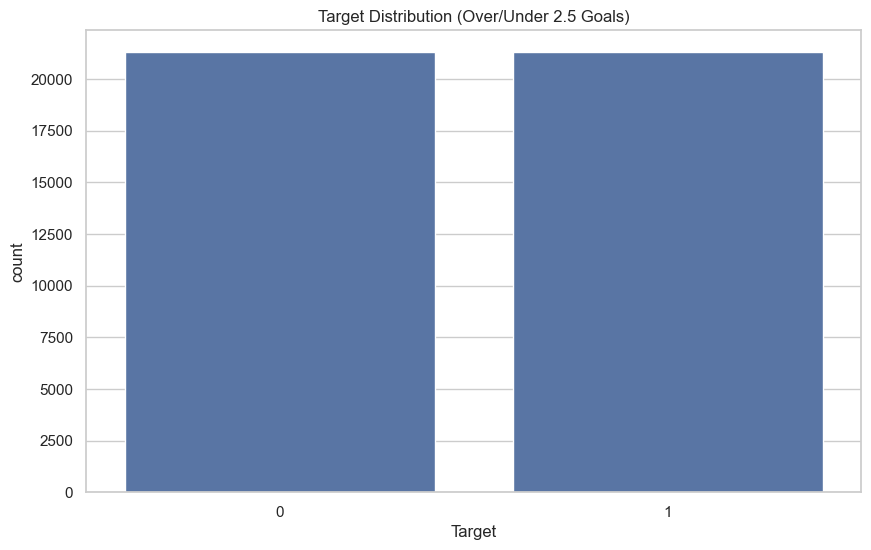

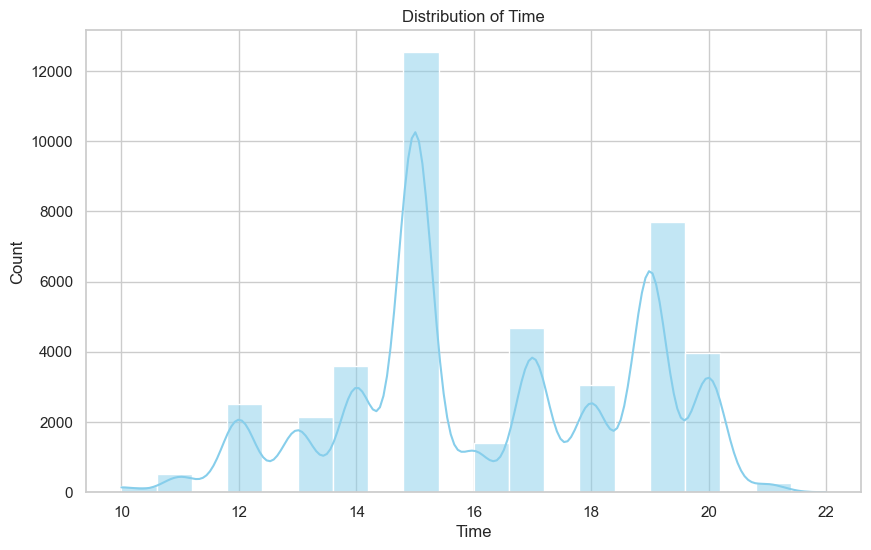

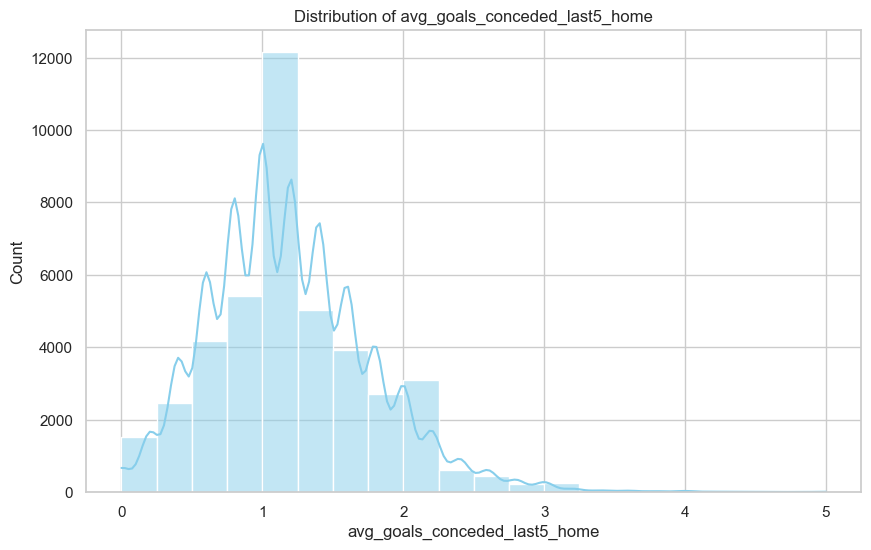

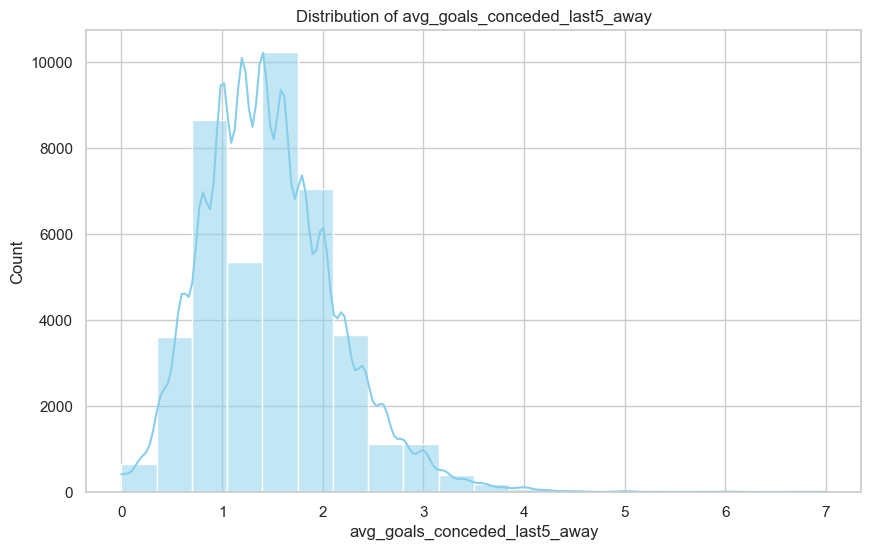

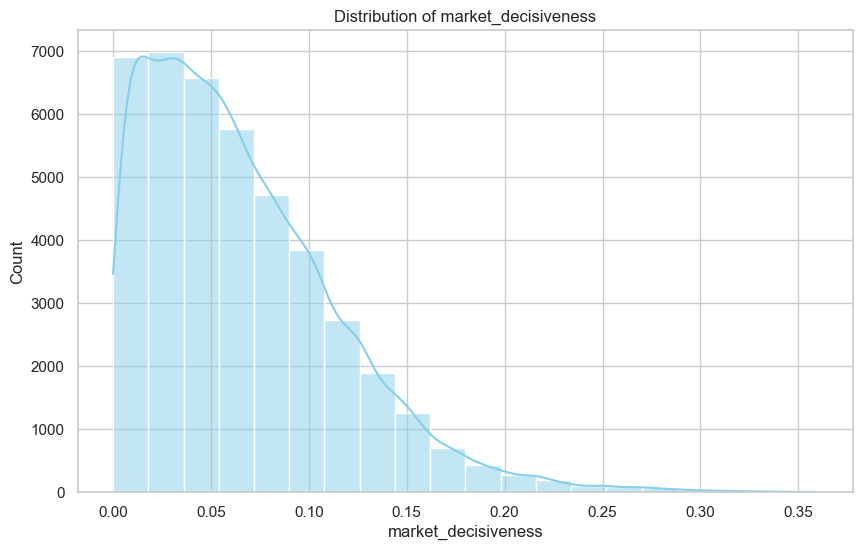

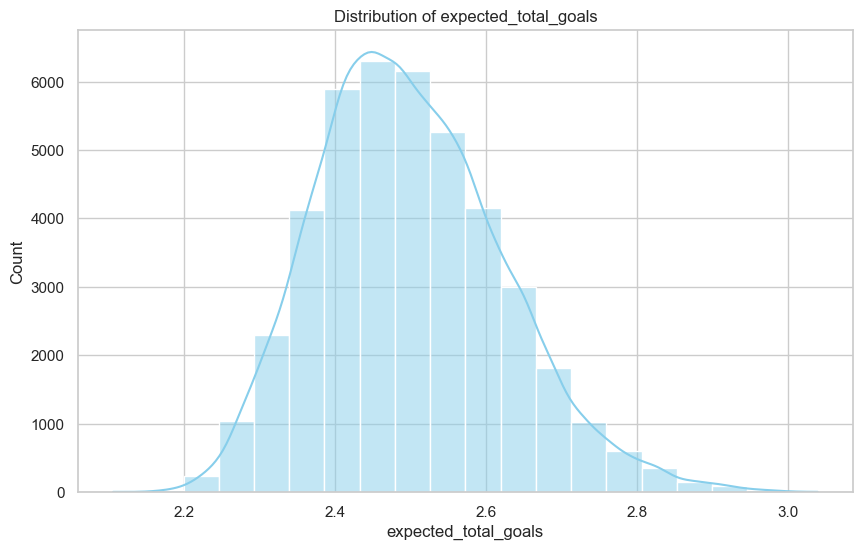

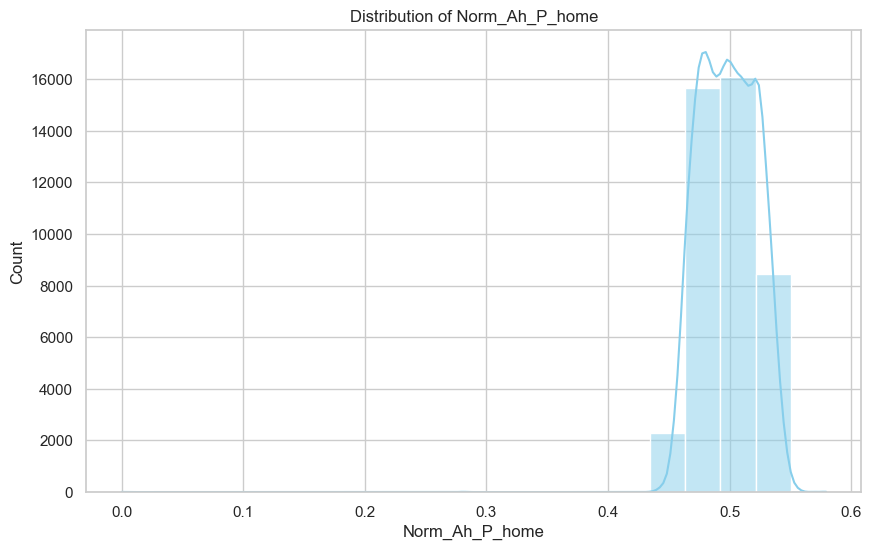

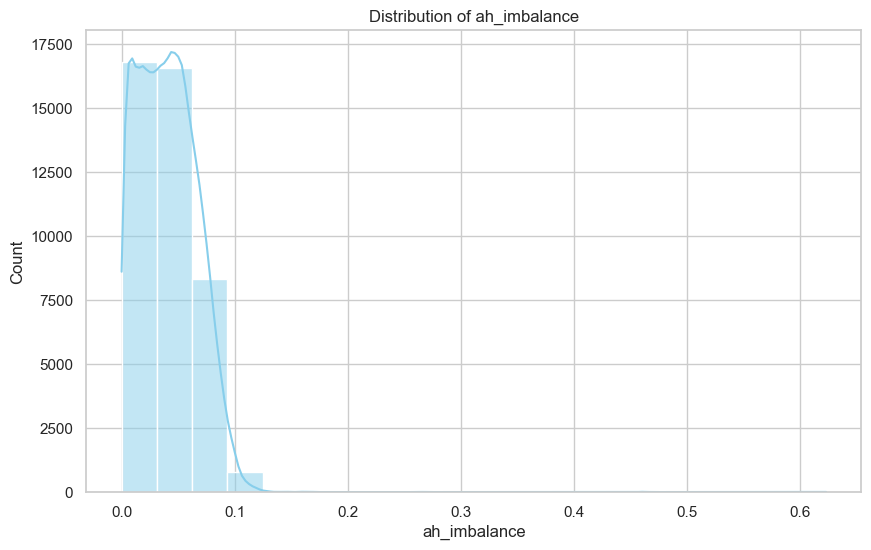

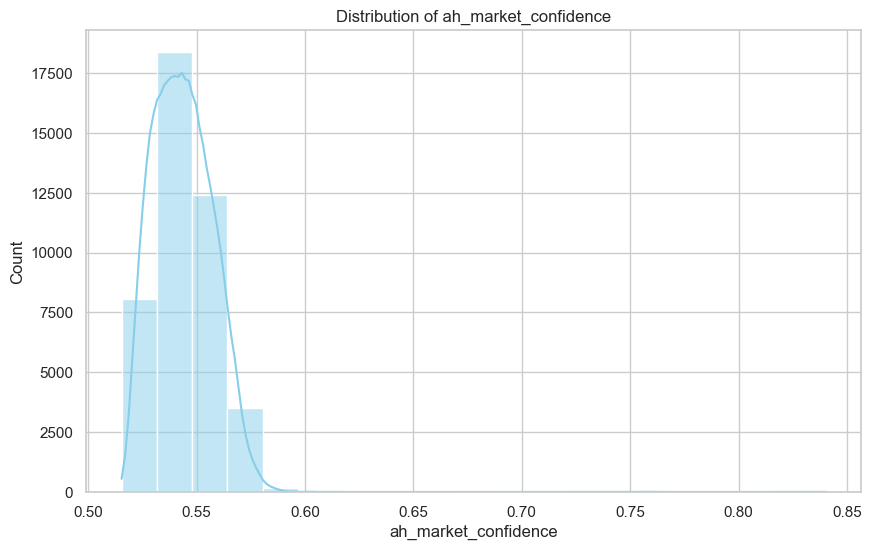

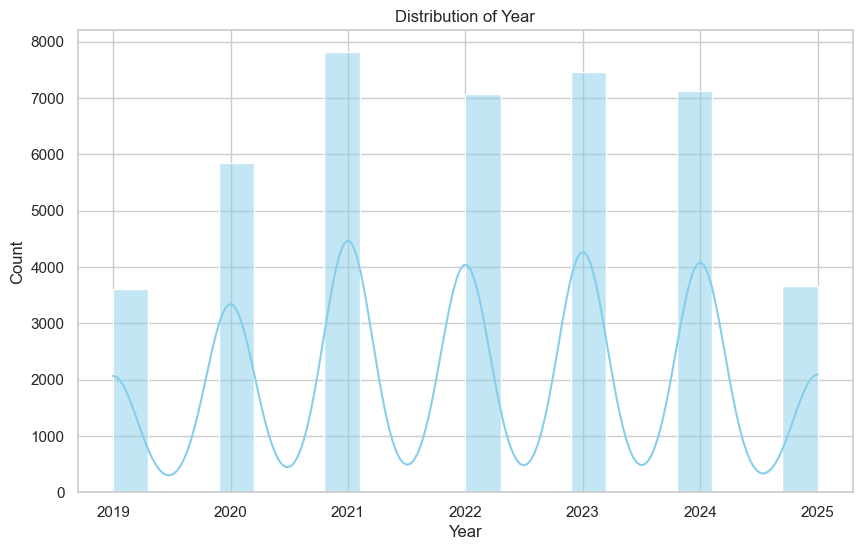

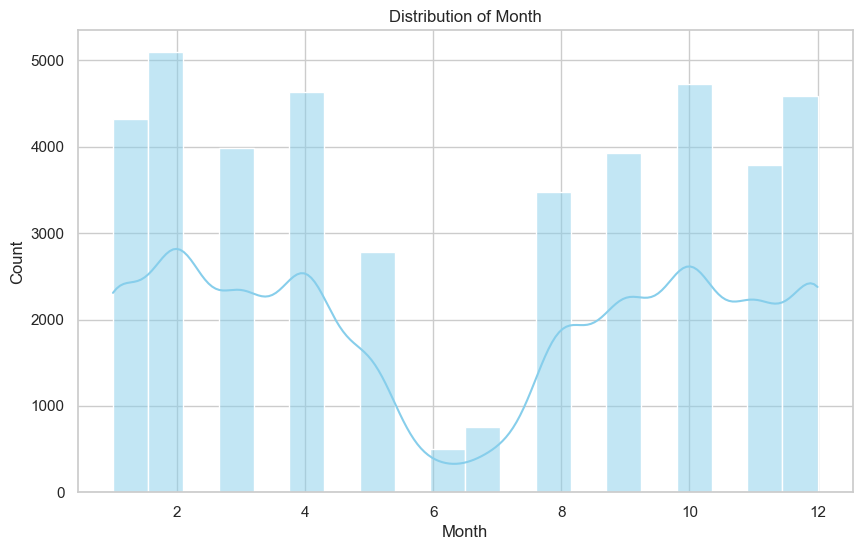

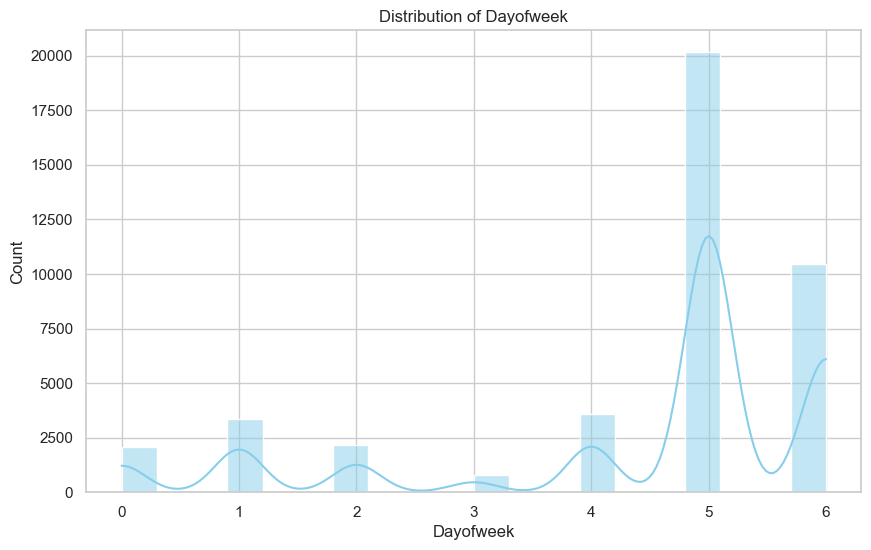

KeyError: 'Season_of_year'

<Figure size 1000x600 with 0 Axes>

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ==========================
# 1️⃣ Target distribution
# ==========================
data_big_a1_encoded['Target'] = data_big_a1_encoded['Target'].astype(int)
sns.countplot(data=data_big_a1_encoded, x='Target')
plt.title('Target Distribution (Over/Under 2.5 Goals)')
plt.show()

# ==========================
# 2️⃣ Numerical features distributions
# ==========================
num_cols = [
    'Time', 'avg_goals_conceded_last5_home',
    'avg_goals_conceded_last5_away',
    'market_decisiveness', 'expected_total_goals',
    'Norm_Ah_P_home', 'ah_imbalance', 'ah_market_confidence',
    'Year', 'Month', 'Dayofweek','Season_of_year'
]

for col in num_cols:
    plt.figure()
    sns.histplot(data_big_a1_encoded[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ==========================
# 3️⃣ Boxplots by Target (handle NaNs)
# ==========================
for col in num_cols:
    plt.figure()
    sns.boxplot(data=data_big_a1_encoded, x='Target', y=col)
    plt.title(f'{col} by Target')
    plt.show()

# ==========================
# 4️⃣ Correlation heatmap (numeric only, drop NaNs)
# ==========================
corr = data_big_a1_encoded[num_cols + ['Target']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# ==========================
# 5️⃣ Categorical features
# ==========================
cat_cols = ['Country', 'Division', 'Is_weekend']

for col in cat_cols:
    plt.figure()
    sns.countplot(data=data_big_a1_encoded, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# ==========================
# 6️⃣ Relationships between key features
# ==========================
plt.figure()
sns.scatterplot(
    data=data_big_a1_encoded, x='expected_total_goals', y='market_decisiveness',
    hue='Target', palette='coolwarm', alpha=0.6
)
plt.title('Expected Goals vs Market Decisiveness by Target')
plt.show()

plt.figure()
sns.scatterplot(
    data=data_big_a1_encoded, x='ah_imbalance', y='ah_market_confidence',
    hue='Target', palette='coolwarm', alpha=0.6
)
plt.title('AH Imbalance vs AH Market Confidence by Target')
plt.show()
